In [35]:
from dolfin import io, cpp, MPI, plotting
import numpy as np

%matplotlib inline

In [2]:
import meshio
# Read the file generated by gmsh
mesh = meshio.read("Models/poission_subdomain.msh")
points, cells, cell_data, field_data = mesh.points, mesh.cells, mesh.cell_data, mesh.field_data

In [3]:
field_data

{'LEFT': array([1, 1]),
 'TOP': array([2, 1]),
 'RIGHT': array([3, 1]),
 'BOTTOM': array([4, 1]),
 'DOMAIN': array([5, 2]),
 'OBSTACLE': array([6, 2])}

In [4]:
with io.XDMFFile(MPI.comm_world, "Models/poisson_subdomain_mesh.xdmf") as xdmf_infile:
    mesh = xdmf_infile.read_mesh( cpp.mesh.GhostMode.none)
    mvc_subdomain = xdmf_infile.read_mvc_size_t(mesh, "subdomain")
domains = cpp.mesh.MeshFunctionSizet(mesh, mvc_subdomain, 1)

In [5]:
with io.XDMFFile(MPI.comm_world, "Models/poisson_subdomain_boundary.xdmf") as xdmf_infile:
    mvc_boundaries = xdmf_infile.read_mvc_size_t(mesh, "boundaries")
boundaries = cpp.mesh.MeshFunctionSizet(mesh, mvc_boundaries, 0)

In [6]:
boundaries.values

array([0, 3, 2, 0, 0, 0, 0, 0, 3, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 3, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0], dtype=uint64)

In [7]:
np.where(boundaries.values == 4)[0]

array([ 11,  12,  31,  37, 100])

# This is the functionality that should be automated

### Cells

In [8]:
mf_domain = cpp.mesh.MeshFunctionSizet(mesh, 2, 0)
mf_obstacle = cpp.mesh.MeshFunctionSizet(mesh, 2, 0)

In [9]:
mf_domain.values[np.where(domains.values == 5)[0]]=5
mf_obstacle.values[np.where(domains.values == 6)[0]]=6

In [10]:
mf_domain.name = "DOMAIN"
mf_obstacle.name = "OBSTACLE"

In [11]:
mf_obstacle.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=uint64)

In [12]:
file1 = io.XDMFFile(MPI.comm_world, "output/domain_mf.xdmf")
file1.write(mf_domain)
file1.write(mf_obstacle)

### Lines

In [13]:
mf_left = cpp.mesh.MeshFunctionSizet(mesh, 1, 0)
mf_right = cpp.mesh.MeshFunctionSizet(mesh, 1, 0)
mf_top = cpp.mesh.MeshFunctionSizet(mesh, 1, 0)
mf_bottom = cpp.mesh.MeshFunctionSizet(mesh, 1, 0)

In [14]:
mf_left.values[np.where(boundaries.values == 1)[0]]=1
mf_right.values[np.where(boundaries.values == 3)[0]]=3
mf_top.values[np.where(boundaries.values == 2)[0]]=2
mf_bottom.values[np.where(boundaries.values == 4)[0]]=4

In [15]:
mf_left.name = "LEFT"
mf_right.name = "RIGHT"
mf_top.name = "TOP"
mf_bottom.name = "BOTTOM"

In [42]:
with io.XDMFFile(MPI.comm_world, "output/boundaries_mf.xdmf") as file2:
    file2.write(mesh)
    file2.write(mf_left)
    file2.write(mf_right)
    file2.write(mf_top)
    file2.write(mf_bottom)

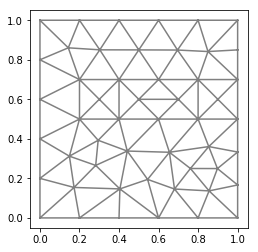

In [40]:
plotting.plot(mf_left.mesh())